<a href="https://colab.research.google.com/github/cdbm/F1DataAnalysis/blob/master/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
circuits=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/circuits.csv")
constructor_results=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructor_results.csv")
constructor_standings=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructor_standings.csv")
constructors=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructors.csv")
driver_standings=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/driver_standings.csv")
drivers=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/drivers.csv")
lap_times=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/lap_times.csv")
pit_stops=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/pit_stops.csv")
qualifying=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/qualifying.csv")
races=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/races.csv")
results=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/results.csv")
seasons=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/seasons.csv")
status=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/status.csv")



# Normalização do sistema de pontuação
ao longo dos anos o modo como se pontuavam as corridas mudou, essa mudança entre temporadas pode mexer com resultados futuros, então é necessário uma padronização no sistema de pontuação.

In [3]:
constructor_standings["year"] = constructor_standings.raceId.map(races.set_index("raceId")["year"])

In [ ]:
from_58_to_59 = constructor_standings[(constructor_standings["year"] >= 1958) & (constructor_standings["year"] <= 1959)]
from_58_to_59["points_norm"] = (from_58_to_59['points'] - from_58_to_59['points'].min()) / (from_58_to_59['points'].max() - from_58_to_59['points'].min())

times_60 = constructor_standings[constructor_standings["year"] == 1960]
times_60["points_norm"] = (times_60['points'] - times_60['points'].min()) / (times_60['points'].max() - times_60['points'].min())

from_61_to_90 = constructor_standings[(constructor_standings["year"] >= 1961) & (constructor_standings["year"] <= 1990)]
from_61_to_90["points_norm"] = (from_61_to_90['points'] - from_61_to_90['points'].min()) / (from_61_to_90['points'].max() - from_61_to_90['points'].min())

from_91_to_02 = constructor_standings[(constructor_standings["year"] >= 1991) & (constructor_standings["year"] <= 2002)]
from_91_to_02["points_norm"] = (from_91_to_02['points'] - from_91_to_02['points'].min()) / (from_91_to_02['points'].max() - from_91_to_02['points'].min())

from_03_to_09 = constructor_standings[(constructor_standings["year"] >= 2003) & (constructor_standings["year"] <= 2009)]
from_03_to_09["points_norm"] = (from_03_to_09['points'] - from_03_to_09['points'].min()) / (from_03_to_09['points'].max() - from_03_to_09['points'].min())

from_10_to_18 = constructor_standings[(constructor_standings["year"] >= 2010) & (constructor_standings["year"] <= 2018)]
from_10_to_18["points_norm"] = (from_10_to_18['points'] - from_10_to_18['points'].min()) / (from_10_to_18['points'].max() - from_10_to_18['points'].min())

from_2019 = constructor_standings[constructor_standings["year"] >= 2019]
from_2019["points_norm"] = (from_2019['points'] - from_2019['points'].min()) / (from_2019['points'].max() - from_2019['points'].min())


points_norms = pd.concat([from_58_to_59, times_60, from_61_to_90, from_91_to_02, from_03_to_09, from_10_to_18, from_2019], ignore_index=True)
constructor_standings["points_norm"] = points_norms["points_norm"]

In [ ]:
from_2019[from_2019["constructorId"] == 131]

In [ ]:
constructor_standings.groupby("year").agg("max")

Normalizando as pontuações para pilotos


In [ ]:
driver_standings["year"] = driver_standings.raceId.map(races.set_index("raceId")["year"])

In [ ]:
driver_standings.sort_values(by="year")

In [ ]:
drivers_from_50_to_59 = constructor_standings[(constructor_standings["year"] >= 1958) & (constructor_standings["year"] <= 1959)]
from_58_to_59["points_norm"] = (from_58_to_59['points'] - from_58_to_59['points'].min()) / (from_58_to_59['points'].max() - from_58_to_59['points'].min())

times_60 = constructor_standings[constructor_standings["year"] == 1960]
times_60["points_norm"] = (times_60['points'] - times_60['points'].min()) / (times_60['points'].max() - times_60['points'].min())

from_61_to_90 = constructor_standings[(constructor_standings["year"] >= 1961) & (constructor_standings["year"] <= 1990)]
from_61_to_90["points_norm"] = (from_61_to_90['points'] - from_61_to_90['points'].min()) / (from_61_to_90['points'].max() - from_61_to_90['points'].min())

from_91_to_02 = constructor_standings[(constructor_standings["year"] >= 1991) & (constructor_standings["year"] <= 2002)]
from_91_to_02["points_norm"] = (from_91_to_02['points'] - from_91_to_02['points'].min()) / (from_91_to_02['points'].max() - from_91_to_02['points'].min())

from_03_to_09 = constructor_standings[(constructor_standings["year"] >= 2003) & (constructor_standings["year"] <= 2009)]
from_03_to_09["points_norm"] = (from_03_to_09['points'] - from_03_to_09['points'].min()) / (from_03_to_09['points'].max() - from_03_to_09['points'].min())

from_10_to_18 = constructor_standings[(constructor_standings["year"] >= 2010) & (constructor_standings["year"] <= 2018)]
from_10_to_18["points_norm"] = (from_10_to_18['points'] - from_10_to_18['points'].min()) / (from_10_to_18['points'].max() - from_10_to_18['points'].min())

from_2019 = constructor_standings[constructor_standings["year"] >= 2019]
from_2019["points_norm"] = (from_2019['points'] - from_2019['points'].min()) / (from_2019['points'].max() - from_2019['points'].min())


points_norms = pd.concat([from_58_to_59, times_60, from_61_to_90, from_91_to_02, from_03_to_09, from_10_to_18, from_2019], ignore_index=True)
constructor_standings["points_norm"] = points_norms["points_norm"]

# Circuitos


Esse dataset mostra uma descrição breve de todos os circuitos que já sediaram alguma corrida de fórmula 1 


In [ ]:
circuits['circuitRef'] = circuits['circuitRef'].astype('category')
circuits['name'] = circuits['name'].astype('category')
circuits['location'] = circuits['location'].astype('category')
circuits['country'] = circuits['country'].astype('category')
circuits['alt'] = circuits['alt'].astype('category')

Descrição dos dados:

circuitId: categórico nominal <br/>
circuitRef: categórico nominal<br/>
name: categórico nominal<br/>
location: categórico nominal<br/>
country: categórico nominal<br/>
lat: Contínuo<br/>
lng: Contínuo<br/>
alt: categórico nominal </br>
url: categórico nominal <br/>


In [ ]:
circuits.head()

In [ ]:
circuits.dtypes

In [ ]:
circuits['country'].cat.categories

Localização dos ciruitos no mapa


In [ ]:
circuits.plot.scatter(x='lng', y='lat')

Países com mais circuitos a sediar uma corrida de fórmula 1


In [ ]:
circuits.groupby(['country']).agg(['count'])["circuitId"].sort_values(by='count', ascending=False).plot.barh()

# Construtores


Esse dataset é reservado para mostrar informações das equipes que correm e correram na categoria.


In [ ]:
constructors['constructorRef'] = constructors['constructorRef'].astype('category')
constructors['name'] = constructors['name'].astype('category')
constructors['nationality'] = constructors['nationality'].astype('category')

Descrição dos dados:

constructorId: categórico nominal <br/>
name: categórico nominal<br/>
nationality: categórico nominal<br/>



In [ ]:
constructors.dtypes

Países com mais equipes <br>
A diferença entre as equipes britânicas para o resto se da pelo fato da inglaterra ser o berço da fórmula 1 e além disso varias equipes escolhem a inglaterra como sede pela comodidade.

In [ ]:
constructors.groupby(['nationality']).agg(['count'])['constructorRef'].sort_values(by='count', ascending=False).plot.barh()

# Resultados Construtores


Esse dataset mostra os resultados das equipes por corridas, mostrando a pontuação total em cada corrida disputada.

Descrição dos dados </br>
status: categórico binário


In [ ]:
constructor_results.head()

In [ ]:
constructor_results.dtypes

In [ ]:
constructor_results["status"] = constructor_results["status"].astype("category")

In [ ]:
constructor_results["status"].cat.categories

# Construtores Standings


o dataset de standings mostra uma visão de como a equipe está situada no campeonato após dada corrida, mostrando os pontos conquistados até aqui, corridas vencidas entre outros.

Descrção dos dados </br>
positionText: categórico nomimal


In [ ]:
constructor_standings.head()

In [ ]:
constructor_standings["positionText"] = constructor_standings["positionText"].astype("category")

In [ ]:
constructor_standings["positionText"].cat.categories

In [ ]:
constructor_standings.dtypes

# Desempenho Construtores

Essa sessão é dedicada a uma análise de desempenho de várias equipes ao longo do tempo, suas pontuações, vitórias e comparações entre elas.

Análise de desempenho da ferrari durante os anos

In [ ]:
ferrari_standings=constructor_standings[constructor_standings.constructorId == 6]
ferrari_standings.sort_values(by="raceId")
ferrari_standings.describe()

O gráfico a seguir mostra a pontuação final por temporada de uma das equipes mais tradicionais da categoria, a ferrari. É útil observar que o grande aumento de pontos nas últimas décadas se da por mudanças de regulamento que passaram a dar mais pontos para as respectivas colocações

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


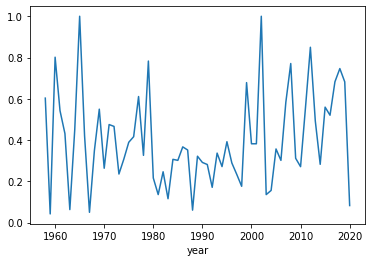

In [36]:
ferrari_standings["year"] = ferrari_standings.raceId.map(races.set_index("raceId")["year"])
ferrari_2019 = ferrari_standings[ferrari_standings.year == 2019]
ferrari_by_year = ferrari_standings.groupby(["year"]).agg("max")["points_norm"]
ferrari_by_year.plot()

Filtro na ferrari para comparar com red bull

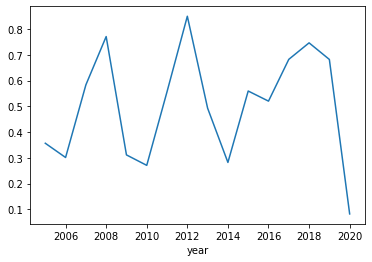

In [41]:
ferrari_from_2005 = ferrari_standings[ferrari_standings.year >= 2005]
ferrari_from_2005 = ferrari_from_2005.groupby(["year"]).agg("max")["points_norm"]
ferrari_from_2005.plot()

Análise de pountuação da Red Bull ao longo dos anos

In [43]:
rbr_standings=constructor_standings[constructor_standings.constructorId == 9]
rbr_standings.sort_values(by="raceId")
rbr_standings.describe()

,constructorStandingsId,raceId,constructorId,points,position,wins,year,points_norm
count,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000
mean,20727.017123,631.287671,9.0,161.993151,3.356164,1.945205,2012.400685,0.156002
std,9595.577586,414.507739,0.0,154.877293,2.099713,2.665242,4.444434,0.170455
min,14.000000,1.000000,9.0,0.000000,1.000000,0.000000,2005.000000,0.000000
25%,24267.000000,74.750000,9.0,24.000000,2.000000,0.000000,2009.000000,0.000000
50%,25329.500000,879.500000,9.0,112.000000,3.000000,1.000000,2012.500000,0.092810
75%,26627.750000,963.250000,9.0,272.000000,5.000000,3.000000,2016.000000,0.271491
max,27541.000000,1036.000000,9.0,650.000000,11.000000,13.000000,2020.000000,0.645833


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


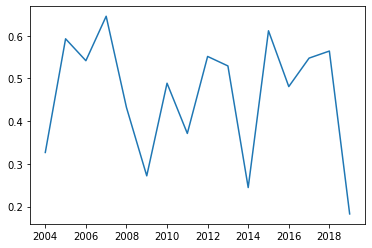

In [44]:
rbr_standings["year"] = rbr_standings.raceId.map(races.set_index("raceId")["year"])
rbr_year_2019 = rbr_standings[rbr_standings.year == 2019]
rbr_by_year = rbr_standings.groupby(["year"]).agg("max")["points_norm"]
plt.plot(np.arange(2004, 2020,1) ,rbr_by_year, label="Red Bull")

Análise de pontuação da mercedes ao longo dos anos

In [45]:
mercedes_standings=constructor_standings[constructor_standings.constructorId == 131]
mercedes_standings.sort_values(by="raceId")
mercedes_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm,name
10130,24235,337,131,18.0,3,3,0,2010,0.131679,Mercedes
10142,24247,338,131,29.0,3,3,0,2010,0.049618,Mercedes
10154,24259,339,131,44.0,4,4,0,2010,0.000000,Mercedes
10166,24271,340,131,60.0,4,4,0,2010,0.027451,Mercedes
10178,24283,341,131,72.0,4,4,0,2010,0.070588,Mercedes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


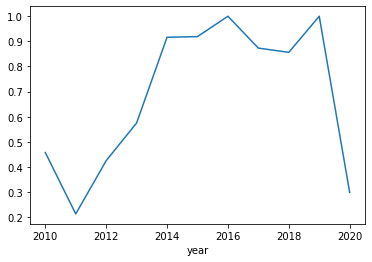

In [46]:
mercedes_standings["year"] = mercedes_standings.raceId.map(races.set_index("raceId")["year"])
mercedes_by_year = mercedes_standings.groupby(["year"]).agg("max")["points_norm"]
mercedes_by_year.plot()

Comparação de pontuação das 3 equipes mais influentes da categoria nos últimos anos


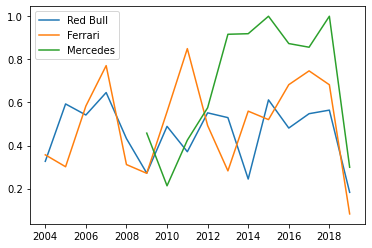

In [47]:
plt.plot(np.arange(2004, 2020,1) ,rbr_by_year, label="Red Bull")
plt.plot(np.arange(2004, 2020,1),ferrari_from_2005, label="Ferrari")
plt.plot(np.arange(2009, 2020, 1), mercedes_by_year, label="Mercedes")
plt.legend()
plt.show()

Análise de desempenho das equipes a partir do ano 2000


In [37]:
constructor_standings["year"] = constructor_standings.raceId.map(races.set_index("raceId")["year"])
constructor_standings["name"] = constructor_standings.constructorId.map(constructors.set_index("constructorId")["name"])
constructor_standings_from_2000 = constructor_standings[constructor_standings["year"] >= 2000]
constructor_standings_from_2000.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm,name
0,1,18,1,14.0,1,1,1,2008,0.0,McLaren
1,2,18,2,8.0,3,3,0,2008,0.0,BMW Sauber
2,3,18,3,9.0,2,2,0,2008,0.0,Williams
3,4,18,4,5.0,4,4,0,2008,0.0,Renault
4,5,18,5,2.0,5,5,0,2008,0.0,Toro Rosso


In [38]:
names = constructor_standings_from_2000["name"].unique().tolist()

In [ ]:
for name in names:
  x = constructor_standings_from_2000.loc[constructor_standings_from_2000["name"] == name]
  x = x.groupby(["year"]).agg("max")
  plt.plot(x.index, x.points_norm, label=name)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.legend()
plt.show()

# Pilotos


In [ ]:
drivers.head()

Descrição dos tipos <br>
nationality: categórico nominal


In [ ]:
drivers["nationality"] = drivers["nationality"].astype("category")

In [ ]:
drivers["nationality"].cat.categories

In [ ]:
drivers.dtypes

Quantidade de pilotos por nacionalidade

In [ ]:
drivers.groupby(['nationality']).agg(['count'])['driverRef'].sort_values(by='count', ascending=False).plot.barh()

# Pilotos Standings


Descrção dos dados </br>
positionText: categórico nomimal

In [ ]:
driver_standings.head()

In [ ]:
driver_standings["positionText"] = driver_standings["positionText"].astype("category") 

In [ ]:
driver_standings["positionText"].cat.categories

In [ ]:
driver_standings.dtypes

Gráfico de desempenho dos pilotos com pelo menos uma vitória a partir do ano 2000

In [ ]:
driver_standings["year"] = driver_standings.raceId.map(races.set_index("raceId")["year"])
driver_standings["name"] = driver_standings.driverId.map(drivers.set_index("driverId")["driverRef"])
driver_standings_from_2000 = driver_standings[driver_standings["year"] >= 2000]
driver_standings_from_2000.head()

In [ ]:
names = driver_standings_from_2000["name"].unique().tolist()

In [ ]:
for name in names:
  x = driver_standings_from_2000.loc[driver_standings_from_2000["name"] == name]
  x = x.groupby(["year"]).agg("max")
  if x.wins.max() > 0: 
    plt.plot(x.index, x.points, label=name)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.legend()
plt.show()

In [ ]:
for name in names:
  x = driver_standings_from_2000.loc[driver_standings_from_2000["name"] == name]
  x = x.groupby(["year"]).agg("max")
  if x.wins.max() > 0: 
    plt.plot(x.index, x.wins, label=name)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.legend()
plt.show()

In [ ]:
driver_standings.set_index("points", inplace=True, drop=False)


A pergunta vem a tona, o numero de vitórias é relevante para ser campeão do mundial de pilotos? (A partir de 2010)


In [ ]:
years = driver_standings["year"].unique()
years

In [ ]:
champions_by_year = [driver_standings[driver_standings["year"] == year].groupby("driverId").agg("max").sort_values(by="points", ascending=False).iloc[0] for year in years] 
champions_by_year = pd.DataFrame(champions_by_year)
champions_by_year.sort_values(by="year")

In [ ]:
champions_by_year["win_percentage"] = champions_by_year["wins"] / champions_by_year.year.map(races.groupby("year").agg("count")["raceId"])
champions_by_year = champions_by_year[champions_by_year["year"] > 2009]
champions_by_year.sort_values(by="year")

In [ ]:
correlations = champions_by_year.corr(method="spearman")
correlations["win_percentage"]["points"] ** 2

# Tempos de Voltas

In [ ]:
lap_times.head()

In [ ]:
lap_times.dtypes

#Pit Stops


In [ ]:
pit_stops.head()

In [ ]:
pit_stops.dtypes

# Qualificação


In [ ]:
qualifying.head()

In [ ]:
qualifying.dtypes

# Corridas

Descrição dos dados </br>
name: categórico nominal


In [ ]:
races.head()

In [ ]:
races["name"] = races["name"].astype("category")

In [ ]:
races["name"].cat.categories

In [ ]:
races.dtypes

#Resultados


In [ ]:
results.head()

In [ ]:
results["positionText"] = results["positionText"].astype("category")

In [ ]:
results.dtypes

In [ ]:
results["positionText"].cat.categories

#Temporadas


In [ ]:
seasons.head()